# Data Generation

Modified the transcript file so that my splitting function can easily detect PDFs containing a single page or double page.

An empty new line marks seperation of the page from left to right. if no new line detected means that it is a single page.

New Convention in transcripts:
- leave an empty line to differentiate between left and right page content
- leave one empty line if either of the right or left page in a double sided PDF is empty or if transcript for that particular side is not available
- No empty line need to be left for single page
- Do not leave line otherwise(even after the ending of a paragraph)
- for new pages `PDF p{page-Number}` marks the start of page and make sure that the `page-Number` matches with the page in the PDF file.

<img src="assets\image.png" alt="Alt text" width="650" height="500">


<img src="assets\image1.png" alt="Alt text" width="300" height="500">

- Note : if the page width  > 1.2 page height it will be considered as a double page and splitted into half.

For example in the above image as left page was empty a line was left and 1 line was left to tell about the shift from left page to right page.(Total 2 empty lines)


## Splitting pages 

splitting the provided data into individual pages and their corresponding transcript.

In [15]:
from src.data_utils import process_books_with_transcripts

In [17]:
process_books_with_transcripts(
    input_books_folder="data/GAN-DATA/1_raw/books",
    input_transcripts_folder="data/GAN-DATA/1_raw/transcripts/",
    output_books_folder="data/GAN-DATA/2_splitted/books/",
    output_transcripts_folder="data/GAN-DATA/2_splitted/transcripts/"
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/GAN-DATA/1_raw/books'

## Image Preprocessing

Various transformations

    'correct_skew': correct_skew,
    'normalize_image': normalize_image,
    'ensure_300ppi': ensure_300ppi,
    'remove_bleed_dual_layer': remove_bleed_dual_layer,
    'denoise_image': denoise_image,
    'sharpen_image': sharpen_image,
    'enhance_contrast': enhance_contrast,
    'morphological_operations': morphological_operations,
    'binarize_image': binarize_image,
    'apply_binary_mask': apply_binary_mask,
    'upscale': upscale




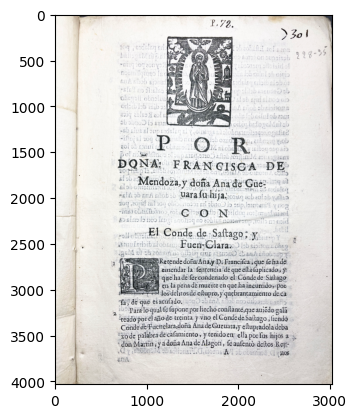

In [4]:
from src.data_utils import *

img = load_image('data/GAN-DATA/2_splitted/books/book7/page1.png')
plt.imshow(img)

In [6]:
## A function to copy all transcripts and images from the source to the destination 
from src.data_utils import copy_all_transcripts, copy_all_images
copy_all_transcripts()
copy_all_images()

In [7]:
from src.data_utils import process_multiple_books

book_transformations = {
    'book1': {
        'denoise_image': {'method': 'bilateral'},
        'denoise_image': {'method': 'nlm'}
    },
    'book2': {
        'ensure_300ppi': {'target_dpi': 150},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'},
        'denoise_image': {'method': 'nlm'},
        'denoise_image': {'method': 'nlm'}
    },
    'book3': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'}
        },
    'book4': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'}
    },
    'book5': {
        'ensure_300ppi': {'target_dpi': 300}
    },
    'book6': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'}
    },
    'book7': {
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'nlm'},
        'denoise_image': {'method': 'bilateral'}
    },
    'book8': {
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'nlm'},
        'denoise_image': {'method': 'bilateral'}
    },
    'book9': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'wiener'},
        'sharpen_image': {'method': 'laplacian'}
    },
    'book10': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'wiener'},
        'sharpen_image': {'method': 'laplacian'}
    },
    'book11': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'},
    },
    'book12': {
        'ensure_300ppi': {'target_dpi': 300},
        'remove_bleed_dual_layer': {},
        'denoise_image': {'method': 'bilateral'},
        'sharpen_image': {'method': 'laplacian'},
    },
}

stats = process_multiple_books(
    books_base_dir="data/GAN-DATA/2_splitted/books", 
    output_dir="data/GAN-DATA/3_processed/books",
    book_transformations=book_transformations
)

Processing 12 books with 98 total pages:


Transforming page Images: 100%|██████████| 98/98 [09:16<00:00,  5.68s/page, book=9, page=31, step=4/4, transform=sharpen_image]           


## Text Detection

In [10]:
from src.data_utils import text_detection

input_root = "data/GAN-DATA/3_processed/books"
output_root = "data/GAN-DATA/4_bounding_boxes//"
model_path = "CRAFT-pytorch/weights/craft_mlt_25k.pth"

text_detection(
    input_root=input_root,
    output_root=output_root,
    model_path=model_path
)

Generating bounding boxes for each book page...


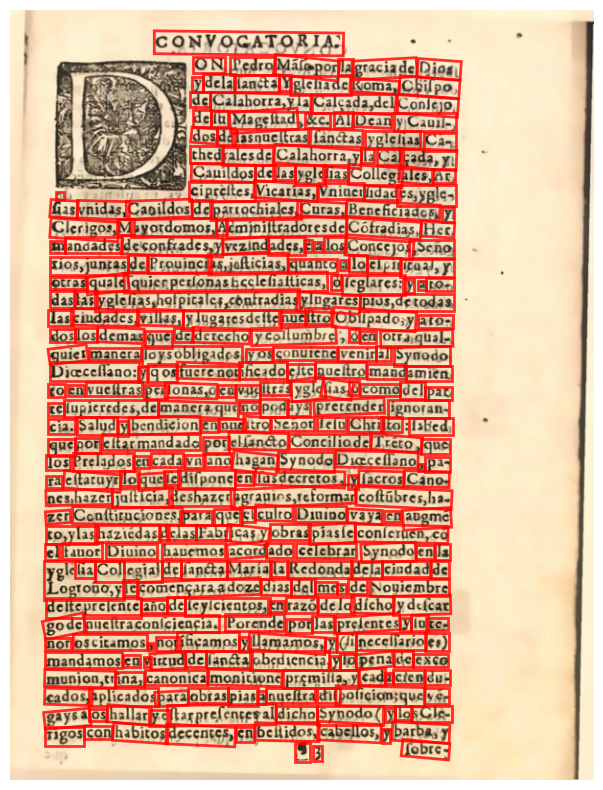

In [33]:
from src.data_utils import plot_bounding_boxes
book = 2
page = 3

plot_bounding_boxes(image_path= f"data/GAN-DATA/3_processed/books/book_{book}_{page}.png",
                    text_file_path=f"data/GAN-DATA/4_bounding_boxes/book_{book}_{page}.txt",
                    save_path = None)

## Mapping word images with corresponding transcript word

In [1]:
from src.data_utils import mapping_bounding_boxes

total_words, total_bboxes, total_mapped = mapping_bounding_boxes(
    image_dir="data/GAN-DATA/3_processed/books",
    bbox_dir="data/GAN-DATA/4_bounding_boxes", 
    transcript_dir="data/GAN-DATA/3_processed/transcripts",
    output_dir="data/GAN-DATA/5_mapped",
    tesseract_model=1,
    similarity_threshold=0.8
)

Processing 98 files...


Mapping bounding boxes: 100%|██████████| 98/98 [51:52<00:00, 31.76s/file]  


=== MAPPING SUMMARY ===
1. Total number of words in transcript files: 17528
2. Total number of bounding boxes detected: 18010
3. Total number of image-word pairs successfully mapped: 11239


## Creating Dataset of words images and labels

In [11]:
from src.data_utils import extract_and_process_all_regions

df = extract_and_process_all_regions(
    image_root = "data/GAN-DATA/3_processed/books",
    aligned_root = "data/GAN-DATA/5_mapped",
    output_root = "data/GAN-DATA/6_word_data/images",
    csv_output_path = "data/GAN-DATA/6_word_data/words.csv"
    )

Creating Word Dataset: 100%|██████████| 98/98 [00:28<00:00,  3.46image/s]

Processed 11239 regions from 98 images
Images saved to: data/GAN-DATA/6_word_data/images
CSV saved to: data/GAN-DATA/6_word_data/words.csv


In [13]:
df

Image          label     book
0          image0.png            fue  book_10
1          image1.png             de  book_10
2          image2.png        Trajano  book_10
3          image3.png  escriviendole  book_10
4          image4.png             la  book_10
...               ...            ...      ...
11234  image11234.png             ha   book_9
11235  image11235.png             la   book_9
11236  image11236.png             de   book_9
11237  image11237.png       virtudes   book_9
11238  image11238.png         porque   book_9

[11239 rows x 3 columns]

## Resizing and Padding

In [14]:
from src.data_utils import analyze_image_sizes
analyze_image_sizes("data/GAN-DATA/6_word_data/images")

Analyzed 11239 images in data/GAN-DATA/6_word_data/images
Dimensions (width x height):
  Minimum: 17 x 22 pixels
  Maximum: 1671 x 578 pixels
  Average: 211.0 x 92.1 pixels


In [16]:
from src.data_utils import resize_and_pad

target_height, target_width = 64,128

resize_and_pad(
    input_dir="data/GAN-DATA/6_word_data/images",
    output_dir="data/GAN-DATA/final_dataset/target",
    target_height=target_height,
    target_width=target_width
)

Resizing and Padding Images: 100%|██████████| 11239/11239 [00:36<00:00, 305.54img/s]


## Rendering Latex Source Images

In [18]:
from src.data_utils import generate_text_image_dataset

config = {
            'text.usetex': False,
            'mathtext.fontset': 'cm',
            'font.family': 'serif',
            'font.serif': ['Times New Roman'],
            'font.weight': 'bold',
            'mathtext.bf': 'bold',
        }

df = generate_text_image_dataset(
csv_path='data/GAN-DATA/6_word_data/words.csv',
output_dir='data/GAN-DATA/final_dataset',
target_dir_prefix='data/GAN-DATA/final_dataset/target/',
image_width=target_width,
image_height=target_height,
base_fontsize=70,
matplotlib_config=config,
custom_font_path='fonts/RomanAntique.ttf', 
progress_bar=True
)

Successfully loaded custom font: fonts/RomanAntique.ttf


Rendering text images: 100%|██████████| 11239/11239 [07:39<00:00, 24.48it/s]


Dataset generated successfully!


In [19]:
import pandas as pd
from src.data_utils import *
df = pd.read_csv("data/GAN-DATA/final_dataset/data.csv")

## Grid Generation

I manually cleaned the final dataset to improve the data quality. Rerunning the below cell block will change the cleaned data

In [20]:
# grid_df = create_image_grids(
#     df=df[df['book'].isin(["book_1", "book_5"])],
#     output_directory="data/GAN-DATA/grid_dataset",
#     num_grids=3000,
#     grid_size=(4,2),
#     target_image_size=(128,64),  # (width, height)
#     random_seed=42
# )

Creating 3000 image grids...
Grid size: 4x2 = 8 images per grid
Target image size: (128, 64)


Creating grids: 100%|██████████| 3000/3000 [03:02<00:00, 16.46it/s]


Successfully created 3000 image grids!


# Model Building

## Dataset Class


In [7]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

class WordImageDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        source = Image.open(self.data.iloc[idx]['source_path']).convert('RGB')
        target = Image.open(self.data.iloc[idx]['target_path']).convert('RGB')
        return self.transform(source), self.transform(target)


## Generator


In [8]:
import torch
import torch.nn as nn

class UNetGenerator(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, features=64):
        super().__init__()

        def down(in_f, out_f, norm=True):
            layers = [nn.Conv2d(in_f, out_f, 4, 2, 1, bias=False)]
            if norm:
                layers.append(nn.BatchNorm2d(out_f))
            layers.append(nn.LeakyReLU(0.2))
            return nn.Sequential(*layers)

        def up(in_f, out_f, dropout=False):
            layers = [nn.ConvTranspose2d(in_f, out_f, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(out_f), nn.ReLU()]
            if dropout:
                layers.append(nn.Dropout(0.5))
            return nn.Sequential(*layers)

        self.down1 = down(in_channels, features, norm=False)
        self.down2 = down(features, features*2)
        self.down3 = down(features*2, features*4)
        self.down4 = down(features*4, features*8)
        self.down5 = down(features*8, features*8)
        self.down6 = down(features*8, features*8)
        self.down7 = down(features*8, features*8)
        self.down8 = down(features*8, features*8, norm=False)

        self.up1 = up(features*8, features*8, dropout=True)
        self.up2 = up(features*16, features*8, dropout=True)
        self.up3 = up(features*16, features*8, dropout=True)
        self.up4 = up(features*16, features*8)
        self.up5 = up(features*16, features*4)
        self.up6 = up(features*8, features*2)
        self.up7 = up(features*4, features)
        self.final = nn.Sequential(
            nn.ConvTranspose2d(features*2, out_channels, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        d1 = self.down1(x); d2 = self.down2(d1)
        d3 = self.down3(d2); d4 = self.down4(d3)
        d5 = self.down5(d4); d6 = self.down6(d5)
        d7 = self.down7(d6); d8 = self.down8(d7)

        u1 = self.up1(d8); u2 = self.up2(torch.cat([u1, d7], 1))
        u3 = self.up3(torch.cat([u2, d6], 1))
        u4 = self.up4(torch.cat([u3, d5], 1))
        u5 = self.up5(torch.cat([u4, d4], 1))
        u6 = self.up6(torch.cat([u5, d3], 1))
        u7 = self.up7(torch.cat([u6, d2], 1))
        return self.final(torch.cat([u7, d1], 1))


## Discriminator

In [9]:
class PatchDiscriminator(nn.Module):
    def __init__(self, in_channels=2, features=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, features, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features, features*2, 4, 2, 1),
            nn.BatchNorm2d(features*2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features*2, features*4, 4, 2, 1),
            nn.BatchNorm2d(features*4),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features*4, features*8, 4, 1, 1),
            nn.BatchNorm2d(features*8),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features*8, 1, 4, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x, y):
        return self.model(torch.cat([x, y], dim=1))


## Training Loop

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import os
import pandas as pd
import numpy as np

def train_pix2pix(csv_file, epochs=100, batch_size=8, lr=2e-4, save_dir="models", val_interval=10):
    
    os.makedirs(save_dir, exist_ok=True)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # ---- Dataset Splitting ----
    full_dataset = WordImageDataset(csv_file)
    total_size = len(full_dataset)
    train_size = int(0.9 * total_size)
    val_size = int(0.05 * total_size)
    test_size = total_size - train_size - val_size

    train_set, val_set, test_set = random_split(full_dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    # ---- Models ----
    G = UNetGenerator().to(device)
    D = PatchDiscriminator().to(device)

    # ---- Optimizers and Loss Functions ----
    opt_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
    criterion_GAN = nn.BCELoss()
    criterion_L1 = nn.L1Loss()

    # ---- History ----
    history = {
        "epoch": [],
        "loss_G": [],
        "loss_D": [],
        "val_loss_L1": [],
        "val_loss_GAN": []
    }

    for epoch in range(epochs):
        G.train()
        D.train()

        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        running_loss_G = 0.0
        running_loss_D = 0.0

        for x, y in loop:
            x, y = x.to(device), y.to(device)
            valid = torch.ones((x.size(0), 1, 30, 30), device=device)
            fake = torch.zeros((x.size(0), 1, 30, 30), device=device)

            # ---- Train Generator ----
            opt_G.zero_grad()
            y_fake = G(x)
            pred_fake = D(y_fake, x)
            loss_GAN = criterion_GAN(pred_fake, valid)
            loss_L1 = criterion_L1(y_fake, y) * 100
            loss_G = loss_GAN + loss_L1
            loss_G.backward()
            opt_G.step()

            # ---- Train Discriminator ----
            opt_D.zero_grad()
            pred_real = D(y, x)
            loss_real = criterion_GAN(pred_real, valid)
            pred_fake = D(y_fake.detach(), x)
            loss_fake = criterion_GAN(pred_fake, fake)
            loss_D = (loss_real + loss_fake) * 0.5
            loss_D.backward()
            opt_D.step()

            running_loss_G += loss_G.item()
            running_loss_D += loss_D.item()

            loop.set_postfix(loss_G=loss_G.item(), loss_D=loss_D.item())

        avg_loss_G = running_loss_G / len(train_loader)
        avg_loss_D = running_loss_D / len(train_loader)

        history["epoch"].append(epoch + 1)
        history["loss_G"].append(avg_loss_G)
        history["loss_D"].append(avg_loss_D)

        # ---- Validation ----
        if (epoch + 1) % val_interval == 0 or epoch == 0:
            G.eval()
            total_L1 = 0.0
            total_GAN = 0.0

            with torch.no_grad():
                for x_val, y_val in val_loader:
                    x_val, y_val = x_val.to(device), y_val.to(device)
                    y_pred = G(x_val)
                    pred = D(y_pred, x_val)

                    loss_l1 = criterion_L1(y_pred, y_val)
                    loss_gan = criterion_GAN(pred, torch.ones_like(pred))

                    total_L1 += loss_l1.item()
                    total_GAN += loss_gan.item()

            val_L1_avg = total_L1 / len(val_loader)
            val_GAN_avg = total_GAN / len(val_loader)

            history["val_loss_L1"].append(val_L1_avg)
            history["val_loss_GAN"].append(val_GAN_avg)

            print(f"\n[Validation @ Epoch {epoch+1}] L1 Loss: {val_L1_avg:.4f}, GAN Loss: {val_GAN_avg:.4f}\n")
        else:
            history["val_loss_L1"].append(np.nan)
            history["val_loss_GAN"].append(np.nan)

    # ---- Save Final Models ----
    torch.save(G.state_dict(), os.path.join(save_dir, "generator_final.pth"))
    torch.save(D.state_dict(), os.path.join(save_dir, "discriminator_final.pth"))

    # ---- Save Training History ----
    pd.DataFrame(history).to_csv(os.path.join(save_dir, "training_history.csv"), index=False)
    print("Training complete. Models and history saved.")

    return G, D, train_loader, val_loader, test_loader

In [6]:
generator, discriminator,train_loader, val_loader, test_loader = train_pix2pix("data/GAN-DATA/grid_dataset/grid_info.csv",
                                                                               epochs=100,
                                                                               batch_size=32,
                                                                               val_interval=1,
                                                                               save_dir="output/GAN_OUTPUT")

Using device: cuda


Epoch 1/100: 100%|██████████| 85/85 [01:18<00:00,  1.09it/s, loss_D=0.00815, loss_G=38.6]



[Validation @ Epoch 1] L1 Loss: 0.3402, GAN Loss: 4.9725



Epoch 2/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.692, loss_G=23.7] 



[Validation @ Epoch 2] L1 Loss: 0.2195, GAN Loss: 0.7120



Epoch 3/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.84, loss_G=20.9] 



[Validation @ Epoch 3] L1 Loss: 0.1917, GAN Loss: 0.6744



Epoch 4/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.579, loss_G=17.1]



[Validation @ Epoch 4] L1 Loss: 0.1754, GAN Loss: 0.8116



Epoch 5/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.569, loss_G=17.7]



[Validation @ Epoch 5] L1 Loss: 0.1673, GAN Loss: 0.9723



Epoch 6/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.509, loss_G=16.4]



[Validation @ Epoch 6] L1 Loss: 0.1623, GAN Loss: 1.4706



Epoch 7/100: 100%|██████████| 85/85 [00:59<00:00,  1.43it/s, loss_D=0.617, loss_G=17.9]



[Validation @ Epoch 7] L1 Loss: 0.1569, GAN Loss: 0.6012



Epoch 8/100: 100%|██████████| 85/85 [01:00<00:00,  1.40it/s, loss_D=0.642, loss_G=17]  



[Validation @ Epoch 8] L1 Loss: 0.1608, GAN Loss: 0.5612



Epoch 9/100: 100%|██████████| 85/85 [01:01<00:00,  1.38it/s, loss_D=0.55, loss_G=15.5] 



[Validation @ Epoch 9] L1 Loss: 0.1583, GAN Loss: 0.7738



Epoch 10/100: 100%|██████████| 85/85 [00:58<00:00,  1.46it/s, loss_D=0.5, loss_G=15.8]  



[Validation @ Epoch 10] L1 Loss: 0.1605, GAN Loss: 1.3104



Epoch 11/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.577, loss_G=17.9]



[Validation @ Epoch 11] L1 Loss: 0.1546, GAN Loss: 0.6327



Epoch 12/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.484, loss_G=14.3]



[Validation @ Epoch 12] L1 Loss: 0.1537, GAN Loss: 1.0667



Epoch 13/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.502, loss_G=12.2]



[Validation @ Epoch 13] L1 Loss: 0.1586, GAN Loss: 1.1486



Epoch 14/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.446, loss_G=14.7]



[Validation @ Epoch 14] L1 Loss: 0.1520, GAN Loss: 0.8762



Epoch 15/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.574, loss_G=14.3]



[Validation @ Epoch 15] L1 Loss: 0.1524, GAN Loss: 0.5796



Epoch 16/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.758, loss_G=12.6]



[Validation @ Epoch 16] L1 Loss: 0.1480, GAN Loss: 0.4574



Epoch 17/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.514, loss_G=11.9]



[Validation @ Epoch 17] L1 Loss: 0.1507, GAN Loss: 1.1372



Epoch 18/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.554, loss_G=12.1]



[Validation @ Epoch 18] L1 Loss: 0.1470, GAN Loss: 1.3690



Epoch 19/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.525, loss_G=12.3]



[Validation @ Epoch 19] L1 Loss: 0.1454, GAN Loss: 0.8760



Epoch 20/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.494, loss_G=11.8]



[Validation @ Epoch 20] L1 Loss: 0.1514, GAN Loss: 1.4122



Epoch 21/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.468, loss_G=11.2]



[Validation @ Epoch 21] L1 Loss: 0.1443, GAN Loss: 1.3258



Epoch 22/100: 100%|██████████| 85/85 [00:59<00:00,  1.43it/s, loss_D=0.563, loss_G=10.5]



[Validation @ Epoch 22] L1 Loss: 0.1435, GAN Loss: 1.2896



Epoch 23/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.465, loss_G=10.6]



[Validation @ Epoch 23] L1 Loss: 0.1457, GAN Loss: 1.5493



Epoch 24/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.483, loss_G=11.4]



[Validation @ Epoch 24] L1 Loss: 0.1471, GAN Loss: 0.8889



Epoch 25/100: 100%|██████████| 85/85 [00:56<00:00,  1.51it/s, loss_D=0.607, loss_G=9.51]



[Validation @ Epoch 25] L1 Loss: 0.1429, GAN Loss: 1.6186



Epoch 26/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.495, loss_G=10.3]



[Validation @ Epoch 26] L1 Loss: 0.1475, GAN Loss: 1.2238



Epoch 27/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.44, loss_G=11.7] 



[Validation @ Epoch 27] L1 Loss: 0.1456, GAN Loss: 0.5902



Epoch 28/100: 100%|██████████| 85/85 [00:56<00:00,  1.51it/s, loss_D=0.26, loss_G=13.1] 



[Validation @ Epoch 28] L1 Loss: 0.1462, GAN Loss: 0.5533



Epoch 29/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.627, loss_G=10.2]



[Validation @ Epoch 29] L1 Loss: 0.1509, GAN Loss: 3.3013



Epoch 30/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.307, loss_G=9.33] 



[Validation @ Epoch 30] L1 Loss: 0.1443, GAN Loss: 0.7578



Epoch 31/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.273, loss_G=11.2] 



[Validation @ Epoch 31] L1 Loss: 0.1498, GAN Loss: 4.4849



Epoch 32/100: 100%|██████████| 85/85 [01:00<00:00,  1.40it/s, loss_D=0.0498, loss_G=14.6]



[Validation @ Epoch 32] L1 Loss: 0.1667, GAN Loss: 5.8992



Epoch 33/100: 100%|██████████| 85/85 [00:59<00:00,  1.44it/s, loss_D=0.0417, loss_G=12.3]



[Validation @ Epoch 33] L1 Loss: 0.1542, GAN Loss: 1.4161



Epoch 34/100: 100%|██████████| 85/85 [00:58<00:00,  1.45it/s, loss_D=0.183, loss_G=9.84]  



[Validation @ Epoch 34] L1 Loss: 0.1522, GAN Loss: 0.3374



Epoch 35/100: 100%|██████████| 85/85 [00:59<00:00,  1.43it/s, loss_D=0.0392, loss_G=14.2]



[Validation @ Epoch 35] L1 Loss: 0.1488, GAN Loss: 5.2245



Epoch 36/100: 100%|██████████| 85/85 [01:01<00:00,  1.39it/s, loss_D=0.55, loss_G=17.4]   



[Validation @ Epoch 36] L1 Loss: 0.1496, GAN Loss: 6.4544



Epoch 37/100: 100%|██████████| 85/85 [00:58<00:00,  1.45it/s, loss_D=0.0104, loss_G=11.6] 



[Validation @ Epoch 37] L1 Loss: 0.1502, GAN Loss: 5.0237



Epoch 38/100: 100%|██████████| 85/85 [00:58<00:00,  1.46it/s, loss_D=0.0403, loss_G=15.2]



[Validation @ Epoch 38] L1 Loss: 0.1492, GAN Loss: 6.0311



Epoch 39/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.146, loss_G=13.3]  



[Validation @ Epoch 39] L1 Loss: 0.1468, GAN Loss: 0.7090



Epoch 40/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.157, loss_G=9.53] 



[Validation @ Epoch 40] L1 Loss: 0.1450, GAN Loss: 0.7049



Epoch 41/100: 100%|██████████| 85/85 [00:57<00:00,  1.47it/s, loss_D=0.274, loss_G=11.2]



[Validation @ Epoch 41] L1 Loss: 0.1524, GAN Loss: 1.6040



Epoch 42/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.302, loss_G=9.98]



[Validation @ Epoch 42] L1 Loss: 0.1461, GAN Loss: 2.9782



Epoch 43/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.285, loss_G=9.12]



[Validation @ Epoch 43] L1 Loss: 0.1446, GAN Loss: 2.8906



Epoch 44/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.37, loss_G=8.67] 



[Validation @ Epoch 44] L1 Loss: 0.1461, GAN Loss: 2.1085



Epoch 45/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.176, loss_G=8.82]



[Validation @ Epoch 45] L1 Loss: 0.1456, GAN Loss: 0.8818



Epoch 46/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.27, loss_G=8.14] 



[Validation @ Epoch 46] L1 Loss: 0.1461, GAN Loss: 3.5972



Epoch 47/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.386, loss_G=8.32]



[Validation @ Epoch 47] L1 Loss: 0.1457, GAN Loss: 1.4144



Epoch 48/100: 100%|██████████| 85/85 [00:56<00:00,  1.51it/s, loss_D=0.227, loss_G=8.31]



[Validation @ Epoch 48] L1 Loss: 0.1436, GAN Loss: 1.8862



Epoch 49/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.353, loss_G=8.84] 



[Validation @ Epoch 49] L1 Loss: 0.1452, GAN Loss: 3.5279



Epoch 50/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.38, loss_G=8.18]  



[Validation @ Epoch 50] L1 Loss: 0.1449, GAN Loss: 4.4834



Epoch 51/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.28, loss_G=8.04]  



[Validation @ Epoch 51] L1 Loss: 0.1453, GAN Loss: 1.5648



Epoch 52/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.185, loss_G=8.36] 



[Validation @ Epoch 52] L1 Loss: 0.1483, GAN Loss: 1.0733



Epoch 53/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.324, loss_G=8.76] 



[Validation @ Epoch 53] L1 Loss: 0.1454, GAN Loss: 2.1837



Epoch 54/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.122, loss_G=9.89] 



[Validation @ Epoch 54] L1 Loss: 0.1461, GAN Loss: 1.4878



Epoch 55/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.375, loss_G=7.42] 



[Validation @ Epoch 55] L1 Loss: 0.1465, GAN Loss: 2.6816



Epoch 56/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.353, loss_G=8.44] 



[Validation @ Epoch 56] L1 Loss: 0.1480, GAN Loss: 4.5905



Epoch 57/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.444, loss_G=6.62] 



[Validation @ Epoch 57] L1 Loss: 0.1430, GAN Loss: 2.8312



Epoch 58/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.447, loss_G=9.58]



[Validation @ Epoch 58] L1 Loss: 0.1477, GAN Loss: 1.5487



Epoch 59/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0883, loss_G=8.85]



[Validation @ Epoch 59] L1 Loss: 0.1478, GAN Loss: 2.4105



Epoch 60/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.193, loss_G=9.74] 



[Validation @ Epoch 60] L1 Loss: 0.1446, GAN Loss: 3.3923



Epoch 61/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.24, loss_G=9.42]  



[Validation @ Epoch 61] L1 Loss: 0.1466, GAN Loss: 5.1244



Epoch 62/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=0.195, loss_G=8.31] 



[Validation @ Epoch 62] L1 Loss: 0.1430, GAN Loss: 1.4943



Epoch 63/100: 100%|██████████| 85/85 [00:59<00:00,  1.44it/s, loss_D=0.0992, loss_G=9.29]



[Validation @ Epoch 63] L1 Loss: 0.1437, GAN Loss: 1.0749



Epoch 64/100: 100%|██████████| 85/85 [00:58<00:00,  1.46it/s, loss_D=0.349, loss_G=6.5]  



[Validation @ Epoch 64] L1 Loss: 0.1425, GAN Loss: 2.6934



Epoch 65/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.418, loss_G=7.33] 



[Validation @ Epoch 65] L1 Loss: 0.1456, GAN Loss: 2.7643



Epoch 66/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.114, loss_G=8.82] 



[Validation @ Epoch 66] L1 Loss: 0.1466, GAN Loss: 4.6892



Epoch 67/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.277, loss_G=7.46] 



[Validation @ Epoch 67] L1 Loss: 0.1446, GAN Loss: 2.2011



Epoch 68/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.919, loss_G=6.92] 



[Validation @ Epoch 68] L1 Loss: 0.1427, GAN Loss: 1.7311



Epoch 69/100: 100%|██████████| 85/85 [01:01<00:00,  1.39it/s, loss_D=0.479, loss_G=6.81]



[Validation @ Epoch 69] L1 Loss: 0.1414, GAN Loss: 1.2835



Epoch 70/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.211, loss_G=7.56] 



[Validation @ Epoch 70] L1 Loss: 0.1431, GAN Loss: 1.8642



Epoch 71/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.213, loss_G=9.36] 



[Validation @ Epoch 71] L1 Loss: 0.1436, GAN Loss: 1.2178



Epoch 72/100: 100%|██████████| 85/85 [01:00<00:00,  1.41it/s, loss_D=0.184, loss_G=10.2] 



[Validation @ Epoch 72] L1 Loss: 0.1466, GAN Loss: 0.9503



Epoch 73/100: 100%|██████████| 85/85 [00:58<00:00,  1.46it/s, loss_D=0.146, loss_G=7.57] 



[Validation @ Epoch 73] L1 Loss: 0.1435, GAN Loss: 3.1803



Epoch 74/100: 100%|██████████| 85/85 [00:57<00:00,  1.47it/s, loss_D=0.403, loss_G=6.33] 



[Validation @ Epoch 74] L1 Loss: 0.1447, GAN Loss: 4.5987



Epoch 75/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.0504, loss_G=9.17]



[Validation @ Epoch 75] L1 Loss: 0.1487, GAN Loss: 2.1783



Epoch 76/100: 100%|██████████| 85/85 [00:57<00:00,  1.49it/s, loss_D=0.463, loss_G=9.28] 



[Validation @ Epoch 76] L1 Loss: 0.1453, GAN Loss: 1.8279



Epoch 77/100: 100%|██████████| 85/85 [00:56<00:00,  1.49it/s, loss_D=1.74, loss_G=12]    



[Validation @ Epoch 77] L1 Loss: 0.1469, GAN Loss: 3.9024



Epoch 78/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.293, loss_G=7.34]



[Validation @ Epoch 78] L1 Loss: 0.1429, GAN Loss: 3.9114



Epoch 79/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.511, loss_G=5.94] 



[Validation @ Epoch 79] L1 Loss: 0.1453, GAN Loss: 4.7674



Epoch 80/100: 100%|██████████| 85/85 [00:59<00:00,  1.44it/s, loss_D=0.118, loss_G=8.02] 



[Validation @ Epoch 80] L1 Loss: 0.1433, GAN Loss: 2.0119



Epoch 81/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.122, loss_G=9.25] 



[Validation @ Epoch 81] L1 Loss: 0.1464, GAN Loss: 4.7321



Epoch 82/100: 100%|██████████| 85/85 [00:59<00:00,  1.43it/s, loss_D=0.174, loss_G=7.32] 



[Validation @ Epoch 82] L1 Loss: 0.1447, GAN Loss: 1.8274



Epoch 83/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.707, loss_G=6.48] 



[Validation @ Epoch 83] L1 Loss: 0.1449, GAN Loss: 1.3086



Epoch 84/100: 100%|██████████| 85/85 [00:56<00:00,  1.51it/s, loss_D=0.568, loss_G=7.5] 



[Validation @ Epoch 84] L1 Loss: 0.1423, GAN Loss: 4.8921



Epoch 85/100: 100%|██████████| 85/85 [00:57<00:00,  1.48it/s, loss_D=0.483, loss_G=6.18] 



[Validation @ Epoch 85] L1 Loss: 0.1422, GAN Loss: 3.8358



Epoch 86/100: 100%|██████████| 85/85 [00:58<00:00,  1.44it/s, loss_D=0.138, loss_G=7.93] 



[Validation @ Epoch 86] L1 Loss: 0.1420, GAN Loss: 3.0824



Epoch 87/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.151, loss_G=6.96] 



[Validation @ Epoch 87] L1 Loss: 0.1434, GAN Loss: 2.3327



Epoch 88/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.679, loss_G=6.41] 



[Validation @ Epoch 88] L1 Loss: 0.1409, GAN Loss: 1.3068



Epoch 89/100: 100%|██████████| 85/85 [00:58<00:00,  1.45it/s, loss_D=0.43, loss_G=6.15]  



[Validation @ Epoch 89] L1 Loss: 0.1426, GAN Loss: 2.5921



Epoch 90/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0586, loss_G=9.19]



[Validation @ Epoch 90] L1 Loss: 0.1446, GAN Loss: 2.0331



Epoch 91/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0761, loss_G=8.22]



[Validation @ Epoch 91] L1 Loss: 0.1449, GAN Loss: 1.5616



Epoch 92/100: 100%|██████████| 85/85 [00:56<00:00,  1.51it/s, loss_D=0.647, loss_G=5.45]



[Validation @ Epoch 92] L1 Loss: 0.1423, GAN Loss: 3.9825



Epoch 93/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0752, loss_G=7.72]



[Validation @ Epoch 93] L1 Loss: 0.1462, GAN Loss: 2.2039



Epoch 94/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.169, loss_G=7.09]



[Validation @ Epoch 94] L1 Loss: 0.1419, GAN Loss: 1.8300



Epoch 95/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.113, loss_G=10.4] 



[Validation @ Epoch 95] L1 Loss: 0.1437, GAN Loss: 1.7164



Epoch 96/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.197, loss_G=8.8]  



[Validation @ Epoch 96] L1 Loss: 0.1435, GAN Loss: 4.9744



Epoch 97/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0526, loss_G=8.72]



[Validation @ Epoch 97] L1 Loss: 0.1447, GAN Loss: 4.0935



Epoch 98/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.0386, loss_G=11.9]



[Validation @ Epoch 98] L1 Loss: 0.1454, GAN Loss: 2.6717



Epoch 99/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.359, loss_G=8.66] 



[Validation @ Epoch 99] L1 Loss: 0.1426, GAN Loss: 2.8546



Epoch 100/100: 100%|██████████| 85/85 [00:56<00:00,  1.50it/s, loss_D=0.111, loss_G=7.03] 



[Validation @ Epoch 100] L1 Loss: 0.1440, GAN Loss: 2.8443

Training complete. Models and history saved.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_gan_history(csv_path):
    # Load the history CSV
    df = pd.read_csv(csv_path)

    # Plot generator and discriminator losses
    plt.figure(figsize=(10, 5))
    plt.plot(df['epoch'], df['loss_G'], label='Generator Loss', linewidth=2)
    plt.plot(df['epoch'], df['loss_D'], label='Discriminator Loss', linewidth=2)

    # Plot validation losses if present
    if 'val_loss_L1' in df.columns:
        plt.plot(df['epoch'], df['val_loss_L1'], label='Val L1 Loss', linestyle='--', color='green')
    if 'val_loss_GAN' in df.columns:
        plt.plot(df['epoch'], df['val_loss_GAN'], label='Val GAN Loss', linestyle='--', color='orange')

    # Labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('GAN Training History')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    save_path = csv_path.replace('.csv', '_history.png')
    plt.savefig(save_path)
    plt.show()


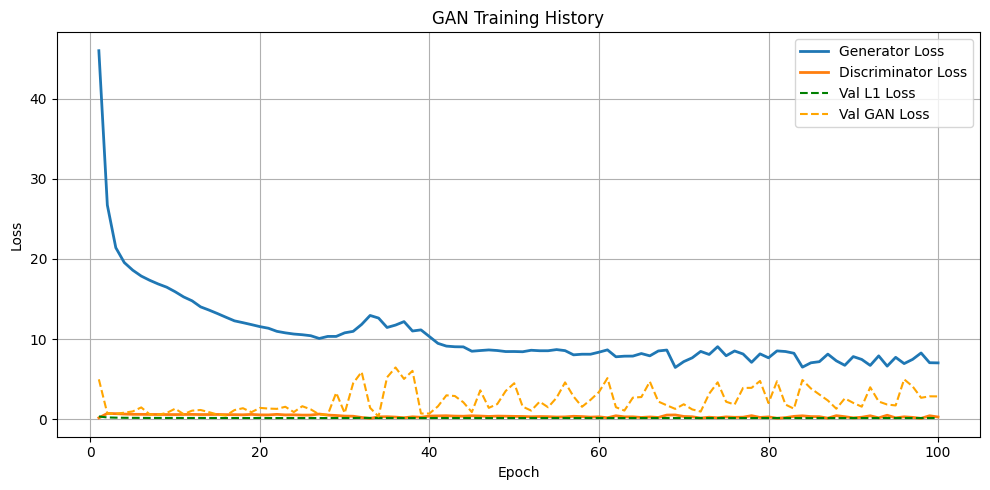

In [12]:
plot_gan_history("output/GAN_OUTPUT/training_history.csv")

In [13]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch
import random

def visualize_pix2pix_results(generator_path, dataloader, num_samples=5, figsize=(12, 4)):
    """
    Visualize Pix2Pix outputs given a test dataloader.

    Args:
        generator_path (str): Path to the trained generator model.
        dataloader (DataLoader): PyTorch DataLoader for test data.
        num_samples (int): Number of samples to visualize.
        figsize (tuple): Width x Height of each row in the plot.
    """
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # Load trained generator
    generator = UNetGenerator(in_channels=1, out_channels=1)
    generator.load_state_dict(torch.load(generator_path, map_location=device))
    generator.eval().to(device)

    # Image un-normalization for display
    to_pil = T.Compose([
        T.Normalize((0.0,), (1 / 0.5,)),  # std
        T.Normalize((-0.5,), (1.0,)),     # mean
        T.ToPILImage()
    ])

    # Gather samples from dataloader
    samples = []
    for batch in dataloader:
        inputs, targets = batch
        for i in range(inputs.size(0)):
            samples.append((inputs[i], targets[i]))
            if len(samples) >= num_samples:
                break
        if len(samples) >= num_samples:
            break

    # Plotting
    fig, axs = plt.subplots(len(samples), 3, figsize=(figsize[0], figsize[1] * len(samples)))
    if len(samples) == 1:
        axs = [axs]  # For consistent 2D indexing

    fig.suptitle('Pix2Pix GAN Results: Font → Handwriting Translation', fontsize=16, fontweight='bold', y=0.98)

    for row_idx, (input_img, target_img) in enumerate(samples):
        input_tensor = input_img.unsqueeze(0).to(device)
        with torch.no_grad():
            output_tensor = generator(input_tensor)

        input_pil = to_pil(input_img.cpu())
        output_pil = to_pil(output_tensor.squeeze(0).cpu())
        target_pil = to_pil(target_img.cpu())

        images = [input_pil, output_pil, target_pil]
        for col_idx, image in enumerate(images):
            axs[row_idx][col_idx].imshow(image, cmap='gray')
            axs[row_idx][col_idx].axis('off')

            # Column titles only on the first row
            if row_idx == 0:
                if col_idx == 0:
                    axs[row_idx][col_idx].set_title("Input Font", fontsize=12, fontweight='bold')
                elif col_idx == 1:
                    axs[row_idx][col_idx].set_title("Generated Handwriting", fontsize=12, fontweight='bold', color='blue')
                elif col_idx == 2:
                    axs[row_idx][col_idx].set_title("Target Handwriting", fontsize=12, fontweight='bold', color='green')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.2)
    save_path = generator_path.replace('generator_final.pth', 'test_visualizations.png')
    plt.savefig(save_path)
    plt.show()


Using device: cuda


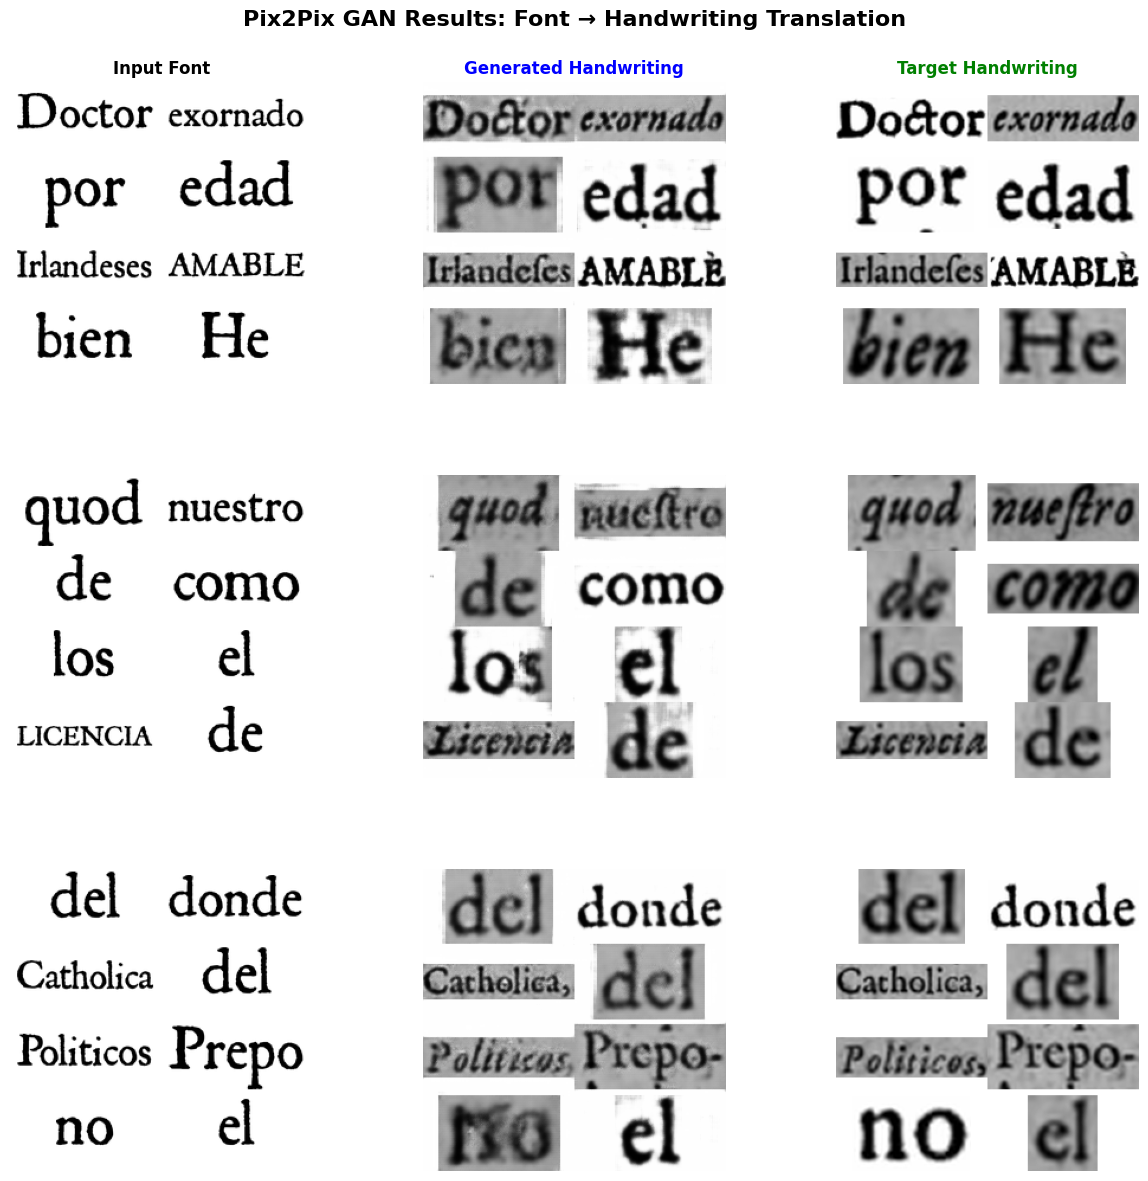

In [15]:
# Assuming you already have your trained model and test_loader:
visualize_pix2pix_results("output/GAN_OUTPUT/generator_final.pth", test_loader, num_samples=3)

## Inference

In [11]:
import torch
import torch.nn as nn
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import io
from pathlib import Path
import os
from typing import List, Optional, Tuple
import matplotlib

class GANInferencePipeline:
    def __init__(self, 
                 generator_path: str,
                 custom_font_path: Optional[str] = None,
                 device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
                 single_image_size: Tuple[int, int] = (128, 64),
                 grid_size: Tuple[int, int] = (4, 2),
                 base_fontsize: int = 45):
        """
        Initialize the GAN inference pipeline.
        
        Args:
            generator_path: Path to the trained generator model
            custom_font_path: Path to custom font file (optional)
            device: Device to run inference on
            single_image_size: Size of individual word images (width, height)
            grid_size: Grid arrangement (rows, cols)
            base_fontsize: Base font size for rendering
        """
        self.device = device
        self.single_image_size = single_image_size
        self.grid_size = grid_size
        self.base_fontsize = base_fontsize
        self.custom_font_path = custom_font_path
        
        # Load the generator model
        self.generator = self.load_generator(generator_path)
        
        # Setup matplotlib configuration
        self.setup_matplotlib_config()
        
        # Load custom font if provided
        self.custom_font_prop = self.load_custom_font()
        
        print(f"GAN Inference Pipeline initialized on {device}")
        print(f"Single image size: {single_image_size}")
        print(f"Grid size: {grid_size[0]}x{grid_size[1]} = {grid_size[0]*grid_size[1]} images")
        
    def load_generator(self, generator_path: str):
        """Load the trained generator model."""
        # You'll need to replace this with your actual UNetGenerator class
        # For now, I'll create a placeholder
        generator = UNetGenerator()  # Replace with your actual generator class
        generator.load_state_dict(torch.load(generator_path, map_location=self.device))
        generator.to(self.device)
        generator.eval()
        return generator
    
    def setup_matplotlib_config(self):
        """Setup matplotlib configuration for text rendering."""
        matplotlib_config = {
            'text.usetex': False,
            'mathtext.fontset': 'cm',
            'font.family': 'serif',
            'font.serif': ['Times New Roman'],
            'font.weight': 'bold',
            'mathtext.bf': 'bold',
        }
        matplotlib.rcParams.update(matplotlib_config)
    
    def load_custom_font(self):
        """Load custom font if provided."""
        if self.custom_font_path and os.path.exists(self.custom_font_path):
            try:
                custom_font_prop = fm.FontProperties(fname=self.custom_font_path)
                print(f"Successfully loaded custom font: {self.custom_font_path}")
                return custom_font_prop
            except Exception as e:
                print(f"Warning: Could not load custom font {self.custom_font_path}: {str(e)}")
                print("Falling back to default font configuration")
        return None
    
    def render_single_word(self, word: str) -> Image.Image:
        """
        Render a single word as an image.
        
        Args:
            word: The word to render
            
        Returns:
            PIL Image of the rendered word (grayscale)
        """
        width, height = self.single_image_size
        
        # Create figure with exact pixel dimensions
        dpi = 150
        figsize = (width/dpi, height/dpi)
        fig = plt.figure(figsize=figsize, dpi=dpi, facecolor='white')
        
        # Create axis that fills the figure completely
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        # Adjust fontsize based on word length
        length_adjustment = max(1, min(15, len(word))) / 7.0
        fontsize = int(self.base_fontsize / length_adjustment)
        
        # Prepare text formatting arguments
        text_kwargs = {
            'fontsize': fontsize,
            'ha': 'center',
            'va': 'center',
            'transform': ax.transAxes,
            'color': 'black'  # Ensure black text for good contrast
        }
        
        # Use custom font if available
        if self.custom_font_prop:
            text_kwargs['fontproperties'] = self.custom_font_prop
            display_text = word
        else:
            display_text = f"$\\mathbf{{{word}}}$"
            text_kwargs['fontweight'] = 'bold'
        
        # Render text at exact center
        ax.text(0.5, 0.5, display_text, **text_kwargs)
        
        # Remove all axes and ensure clean background
        ax.axis('off')
        ax.set_facecolor('white')
        
        # Save to buffer
        buf = io.BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight', 
                    pad_inches=0, facecolor='white', edgecolor='none',
                    dpi=dpi)
        plt.close(fig)
        buf.seek(0)
        
        # Load and process the image
        rendered_img = Image.open(buf)
        rendered_img = rendered_img.convert('L')  # Convert to grayscale
        
        # Create final canvas with exact target dimensions (grayscale)
        final_img = Image.new('L', (width, height), 255)  # White background
        
        # Calculate scaling to fit the rendered text optimally
        rendered_width, rendered_height = rendered_img.size
        
        # Scale to use 90% of the canvas for better visual appearance
        scale_w = (width * 0.9) / rendered_width
        scale_h = (height * 0.9) / rendered_height
        scale = min(scale_w, scale_h)
        
        new_width = int(rendered_width * scale)
        new_height = int(rendered_height * scale)
        
        # Resize with high quality resampling
        resample_method = Image.LANCZOS if hasattr(Image, 'LANCZOS') else Image.ANTIALIAS
        resized_img = rendered_img.resize((new_width, new_height), resample_method)
        
        # Calculate exact center position
        x_offset = (width - new_width) // 2
        y_offset = (height - new_height) // 2
        
        # Paste the resized image at the center
        final_img.paste(resized_img, (x_offset, y_offset))
        
        return final_img
    
    def create_grid_from_words(self, words: List[str]) -> Image.Image:
        """
        Create a grid image from a list of words.
        
        Args:
            words: List of words to render and arrange in grid
            
        Returns:
            PIL Image of the grid (grayscale)
        """
        rows, cols = self.grid_size
        expected_words = rows * cols
        
        # Pad or truncate words list to match grid size
        if len(words) < expected_words:
            # Pad with empty strings
            words = words + [''] * (expected_words - len(words))
        elif len(words) > expected_words:
            # Truncate to fit grid
            words = words[:expected_words]
            print(f"Warning: Truncated word list to {expected_words} words to fit {rows}x{cols} grid")
        
        # Render individual word images
        word_images = []
        for word in words:
            if word.strip():  # Only render non-empty words
                img = self.render_single_word(word)
            else:
                # Create empty image for empty words (grayscale)
                img = Image.new('L', self.single_image_size, 255)  # White background
            word_images.append(img)
        
        # Create grid
        single_width, single_height = self.single_image_size
        grid_width = cols * single_width
        grid_height = rows * single_height
        
        grid_image = Image.new('L', (grid_width, grid_height), 255)  # Grayscale grid
        
        # Paste images into grid
        for i, img in enumerate(word_images):
            row = i // cols
            col = i % cols
            
            x = col * single_width
            y = row * single_height
            
            grid_image.paste(img, (x, y))
        
        return grid_image
    
    def preprocess_image(self, image: Image.Image) -> torch.Tensor:
        """
        Preprocess image for GAN input.
        
        Args:
            image: PIL Image to preprocess (grayscale)
            
        Returns:
            Preprocessed tensor ready for GAN (1-channel)
        """
        # Convert to numpy array
        image_array = np.array(image)
        
        # Convert to tensor
        image_tensor = torch.from_numpy(image_array).float()
        
        # Add channel dimension (HW -> CHW) for grayscale
        image_tensor = image_tensor.unsqueeze(0)
        
        # Normalize to [-1, 1] range (assuming input images are in [0, 255])
        image_tensor = (image_tensor / 127.5) - 1.0
        
        # Add batch dimension
        image_tensor = image_tensor.unsqueeze(0)
        
        return image_tensor.to(self.device)
    
    def postprocess_output(self, output_tensor: torch.Tensor) -> Image.Image:
        """
        Convert GAN output tensor back to PIL Image.
        
        Args:
            output_tensor: Output tensor from GAN (1-channel or 3-channel)
            
        Returns:
            PIL Image
        """
        # Remove batch dimension and move to CPU
        output_tensor = output_tensor.squeeze(0).cpu()
        
        # Denormalize from [-1, 1] to [0, 255]
        output_tensor = (output_tensor + 1.0) * 127.5
        output_tensor = torch.clamp(output_tensor, 0, 255)
        
        # Convert to numpy
        output_array = output_tensor.numpy().astype(np.uint8)
        
        # Handle different channel configurations
        if output_tensor.shape[0] == 1:  # Single channel (grayscale)
            output_array = output_array.squeeze(0)  # Remove channel dimension
            return Image.fromarray(output_array, mode='L')
        elif output_tensor.shape[0] == 3:  # Three channels (RGB)
            output_array = output_array.transpose(1, 2, 0)  # CHW -> HWC
            return Image.fromarray(output_array, mode='RGB')
        else:
            raise ValueError(f"Unsupported number of channels: {output_tensor.shape[0]}")
    
    def generate_handwriting(self, words: List[str]) -> Tuple[Image.Image, Image.Image]:
        """
        Generate handwriting from a list of words.
        
        Args:
            words: List of words to convert to handwriting
            
        Returns:
            Tuple of (input_grid, output_handwriting) PIL Images
        """
        # Create grid from words (grayscale)
        input_grid = self.create_grid_from_words(words)
        
        # Preprocess for GAN
        input_tensor = self.preprocess_image(input_grid)
        
        # Generate handwriting using GAN
        with torch.no_grad():
            output_tensor = self.generator(input_tensor)
        
        # Postprocess output
        output_handwriting = self.postprocess_output(output_tensor)
        
        return input_grid, output_handwriting
    
    def save_results(self, 
                    input_grid: Image.Image, 
                    output_handwriting: Image.Image,
                    output_dir: str = "inference_results",
                    filename_prefix: str = "result"):
        """
        Save the input and output images.
        
        Args:
            input_grid: Input grid image
            output_handwriting: Generated handwriting image
            output_dir: Directory to save results
            filename_prefix: Prefix for saved filenames
        """
        os.makedirs(output_dir, exist_ok=True)
        
        input_path = os.path.join(output_dir, f"{filename_prefix}_input.png")
        output_path = os.path.join(output_dir, f"{filename_prefix}_output.png")
        
        input_grid.save(input_path)
        output_handwriting.save(output_path)
        
        print(f"Results saved:")
        print(f"  Input: {input_path}")
        print(f"  Output: {output_path}")
        
        return input_path, output_path


In [12]:
# Initialize the pipeline
pipeline = GANInferencePipeline(
    generator_path="output/GAN_OUTPUT/generator_final.pth",  
    custom_font_path="fonts/RomanAntique.ttf", 
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# Example words to convert
words = ["confieso", "los", "a","y", "noticias","mucho",'la','todo']

# Generate handwriting
input_grid, output_handwriting = pipeline.generate_handwriting(words)

# Save results
pipeline.save_results(input_grid, output_handwriting, 
                        output_dir="output/GAN_OUTPUT/inference_results", 
                        filename_prefix="sample")

Successfully loaded custom font: fonts/RomanAntique.ttf
GAN Inference Pipeline initialized on cuda
Single image size: (128, 64)
Grid size: 4x2 = 8 images
Results saved:
  Input: output/GAN_OUTPUT/inference_results\sample_input.png
  Output: output/GAN_OUTPUT/inference_results\sample_output.png


('output/GAN_OUTPUT/inference_results\\sample_input.png',
 'output/GAN_OUTPUT/inference_results\\sample_output.png')

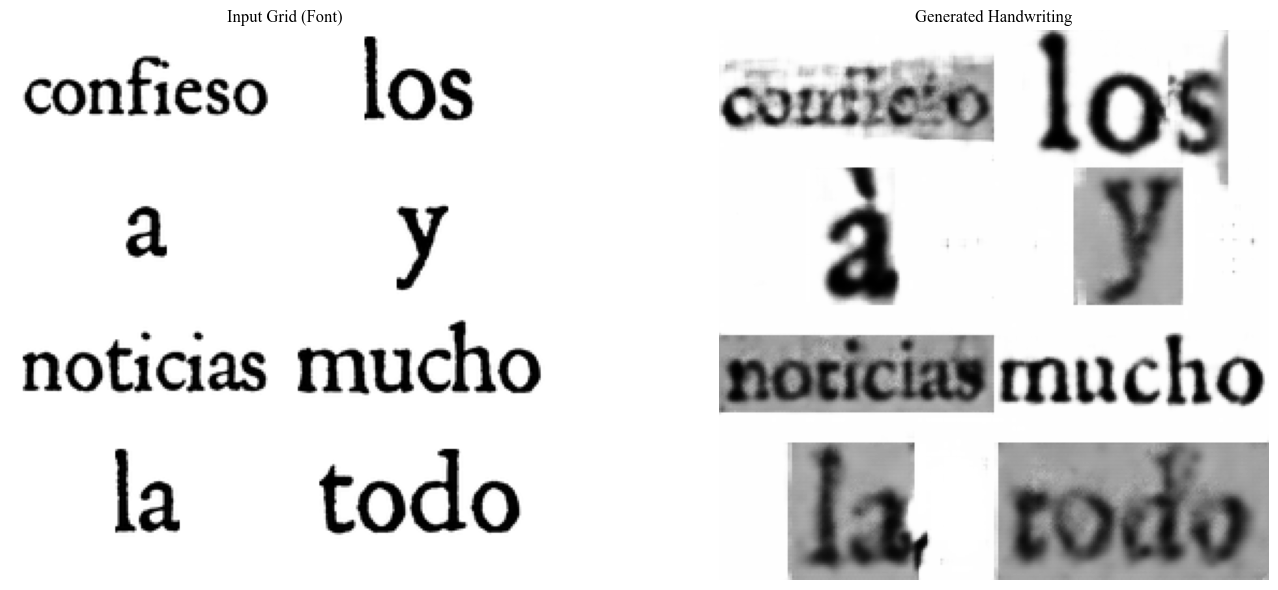

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(input_grid, cmap='gray')
axes[0].set_title("Input Grid (Font)")
axes[0].axis('off')

axes[1].imshow(output_handwriting, cmap='gray')  # Added cmap='gray'
axes[1].set_title("Generated Handwriting")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Degrading Pages using algorithmic approach

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance
import numpy as np
import cv2
import textwrap
from tqdm import tqdm

class SyntheticPageGenerator:
    def __init__(self, font_path, background_dir, text_dir, output_dir, bbox_dir,
            font_size=None, line_spacing_ratio=0.4, margin_ratio=0.08):
            self.font_path = font_path
            self.background_dir = background_dir
            self.text_dir = text_dir
            self.output_dir = output_dir
            self.bbox_dir = bbox_dir
            self.font_size = font_size
            self.line_spacing_ratio = line_spacing_ratio
            self.margin_ratio = margin_ratio
            os.makedirs(output_dir, exist_ok=True)
            os.makedirs(bbox_dir, exist_ok=True)

    def get_random_background(self):
        bg_files = [os.path.join(self.background_dir, f) for f in os.listdir(self.background_dir) if f.lower().endswith(('.jpg','.jpeg', '.png'))]
        return Image.open(random.choice(bg_files)).convert("RGB")

    def get_random_text_file(self):
        """Get a random text file for bleed-through effect"""
        text_files = [f for f in os.listdir(self.text_dir) if f.lower().endswith('.txt')]
        if not text_files:
            return None
        
        selected_file = random.choice(text_files)
        try:
            with open(os.path.join(self.text_dir, selected_file), 'r', encoding='utf-8') as f:
                return f.read()
        except:
            return None

    def create_bleed_text_image(self, text, image_size, font_size, line_spacing, padding):
        """Create a text image for bleed-through effect with improved realism"""
        if not text:
            return None
            
        # Create a blank image for the bleed text (same size as cropped background)
        bleed_img = Image.new('L', image_size, 255)  # White background
        cropped_width, cropped_height = image_size
            
        try:
            font = ImageFont.truetype(self.font_path, font_size)
        except:
            font = ImageFont.load_default()
        
        # Prepare text lines (same as main text processing)
        lines = text.splitlines()
        
        # Calculate line widths (same as main text)
        line_widths = []
        draw_temp = ImageDraw.Draw(bleed_img)
        
        for line in lines:
            if not line.strip():
                line_widths.append(0)
                continue
            try:
                bbox = draw_temp.textbbox((0, 0), line, font=font)
                line_width = bbox[2] - bbox[0]
            except AttributeError:
                line_width, _ = draw_temp.textsize(line, font=font)
            
            line_widths.append(line_width)
        
        # Draw text with EXACT same layout as main text but with variations
        draw = ImageDraw.Draw(bleed_img)
        current_y = padding  # Start from the same padding as main text

        for i, line in enumerate(lines):
            if not line.strip():
                current_y += line_spacing
                continue

            # Center each line horizontally within the cropped area (SAME as main text)
            line_width = line_widths[i]
            # start_x = (cropped_width - line_width) // 2
            start_x = padding


            # Enhanced random offset for bleed text to create misalignment
            x_offset = random.randint(-3, 3)
            y_offset = random.randint(-2, 2)

            # Vary the intensity of different words/characters for more realistic bleed
            words = line.split()
            current_x = start_x + x_offset
            
            for word_idx, word in enumerate(words):
                # Different bleed intensity for each word
                # word_intensity = random.randint(60, 120)  # Varying gray levels
                word_intensity = random.randint(30, 90)
                
                # Draw word with random micro-offsets
                word_x_offset = random.randint(-1, 1)
                word_y_offset = random.randint(-1, 1)
                
                draw.text((current_x + word_x_offset, current_y + y_offset + word_y_offset), 
                         word, font=font, fill=word_intensity)
                
                # Calculate word width for next word positioning
                try:
                    word_bbox = draw_temp.textbbox((0, 0), word + " ", font=font)
                    word_width = word_bbox[2] - word_bbox[0]
                except AttributeError:
                    word_width, _ = draw_temp.textsize(word + " ", font=font)
                
                current_x += word_width
            
            current_y += font_size + line_spacing
            
        return bleed_img

    def create_recto_verso_bleed_map(self, recto_image, verso_text_image, bleed_intensity):
        """Create enhanced bleed intensity map with more realistic patterns"""
        if verso_text_image is None:
            return np.ones(recto_image.size[::-1], dtype=np.float32) * 255, np.zeros(recto_image.size[::-1], dtype=np.float32)
        
        # Convert PIL to numpy
        verso_array = np.array(verso_text_image)
        
        # Invert so text areas are high intensity
        verso_inverted = 255 - verso_array
        
        # Create base bleed intensity map
        bleed_intensity_map = verso_inverted.astype(np.float32) / 255.0
        
        # Add multiple layers of noise for more realistic texture
        # Fine grain noise
        fine_noise = np.random.normal(0, 0.05, bleed_intensity_map.shape)
        # Medium grain noise
        medium_noise = np.random.normal(0, 0.08, bleed_intensity_map.shape)
        # Coarse noise for paper fiber variations
        coarse_noise = np.random.normal(0, 0.12, bleed_intensity_map.shape)
        
        # Combine noise layers
        combined_noise = fine_noise * 0.4 + medium_noise * 0.4 + coarse_noise * 0.2
        bleed_intensity_map = np.clip(bleed_intensity_map + combined_noise, 0, 1)
        
        # Apply multiple blur stages to simulate ink spreading through paper fibers
        # Initial blur for immediate ink spread
        bleed_intensity_map = cv2.GaussianBlur(bleed_intensity_map, (5, 5), 1.2)
        
        # Secondary blur for deeper penetration
        secondary_blur = cv2.GaussianBlur(bleed_intensity_map, (9, 9), 2.5)
        bleed_intensity_map = bleed_intensity_map * 0.7 + secondary_blur * 0.3
        
        # Add directional bias to simulate paper grain
        kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) * 0.1
        kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) * 0.1
        
        grad_x = cv2.filter2D(bleed_intensity_map, -1, kernel_x)
        grad_y = cv2.filter2D(bleed_intensity_map, -1, kernel_y)
        
        # Apply subtle directional bleeding
        bleed_intensity_map += (grad_x * 0.05 + grad_y * 0.03)
        bleed_intensity_map = np.clip(bleed_intensity_map, 0, 1)
        
        # Scale by overall bleed intensity
        bleed_intensity_map *= bleed_intensity
        
        # Create enhanced blurred verso for bleeding with multiple passes
        verso_blurred = verso_inverted.astype(np.float32)
        verso_blurred = cv2.GaussianBlur(verso_blurred, (3, 3), 0.8)
        verso_blurred = cv2.GaussianBlur(verso_blurred, (7, 7), 1.8)
        
        return verso_blurred, bleed_intensity_map
   
    def apply_recto_verso_bleed(self, recto_image, verso_text_image, bleed_intensity_range=(0.7, 0.9)):
        """Apply enhanced ink bleed without converting to grayscale (preserve color)"""
        bleed_intensity = random.uniform(bleed_intensity_range[0], bleed_intensity_range[1])

        verso_blurred, bleed_intensity_map = self.create_recto_verso_bleed_map(
            recto_image, verso_text_image, bleed_intensity
        )

        # Convert PIL to numpy RGB array
        recto_array = np.array(recto_image.convert("RGB"))
        verso_blurred = verso_blurred.astype(np.float32)
        bleed_intensity_map = bleed_intensity_map.astype(np.float32)

        result = recto_array.astype(np.float32)

        # Prepare different contribution layers (grayscale, but to be applied per-channel)
        strong_bleed_areas = bleed_intensity_map > 0.15
        medium_bleed_areas = (bleed_intensity_map > 0.05) & (bleed_intensity_map <= 0.15)
        weak_bleed_areas = (bleed_intensity_map > 0.02) & (bleed_intensity_map <= 0.05)

        if np.any(strong_bleed_areas):
            strong_contribution = verso_blurred[strong_bleed_areas] * bleed_intensity_map[strong_bleed_areas]
            strong_contribution = strong_contribution * 0.5 + 180 * 0.5
            alpha_strong = bleed_intensity_map[strong_bleed_areas] * 0.9
            for c in range(3):
                result[..., c][strong_bleed_areas] = (
                    result[..., c][strong_bleed_areas] * (1 - alpha_strong) +
                    strong_contribution * alpha_strong
                )

        if np.any(medium_bleed_areas):
            medium_contribution = verso_blurred[medium_bleed_areas] * bleed_intensity_map[medium_bleed_areas]
            medium_contribution = medium_contribution * 0.4 + 200 * 0.6
            alpha_medium = bleed_intensity_map[medium_bleed_areas] * 0.6
            for c in range(3):
                result[..., c][medium_bleed_areas] = (
                    result[..., c][medium_bleed_areas] * (1 - alpha_medium) +
                    medium_contribution * alpha_medium
                )

        if np.any(weak_bleed_areas):
            weak_contribution = verso_blurred[weak_bleed_areas] * bleed_intensity_map[weak_bleed_areas]
            weak_contribution = weak_contribution * 0.3 + 220 * 0.7
            alpha_weak = bleed_intensity_map[weak_bleed_areas] * 0.3
            for c in range(3):
                result[..., c][weak_bleed_areas] = (
                    result[..., c][weak_bleed_areas] * (1 - alpha_weak) +
                    weak_contribution * alpha_weak
                )

        # Clip and convert back to uint8
        result = np.clip(result, 0, 255).astype(np.uint8)

        return Image.fromarray(result), bleed_intensity

    def add_stains_and_spots(self, image):
        """Add random stains and age spots to the image with improved variety"""
        draw = ImageDraw.Draw(image)
        width, height = image.size
        
        # Add random stains with varying types
        num_stains = random.randint(2, 6)
        for _ in range(num_stains):
            # Random stain position and size
            x = random.randint(0, width)
            y = random.randint(0, height)
            radius = random.randint(15, 60)
            
            # Enhanced brownish stain colors
            brown_variations = [
                (139, 117, 93),   # Dark brown
                (160, 142, 116),  # Medium brown  
                (101, 84, 63),    # Very dark brown
                (121, 101, 75),   # Another brown variant
                (145, 125, 95),   # Light brown
                (85, 70, 50),     # Very dark coffee
            ]
            
            stain_color = random.choice(brown_variations)
            # Variable transparency
            alpha = random.randint(15, 45)
            
            # Create different stain shapes
            stain_img = Image.new('RGBA', image.size, (0, 0, 0, 0))
            stain_draw = ImageDraw.Draw(stain_img)
            
            # Randomly choose stain shape
            if random.random() < 0.7:  # Circular stains
                stain_draw.ellipse([x-radius, y-radius, x+radius, y+radius], 
                                 fill=(*stain_color, alpha))
            else:  # Irregular polygon stains
                points = []
                for i in range(6):
                    angle = i * 60 + random.randint(-15, 15)
                    r = radius + random.randint(-radius//3, radius//3)
                    px = x + r * np.cos(np.radians(angle))
                    py = y + r * np.sin(np.radians(angle))
                    points.append((px, py))
                stain_draw.polygon(points, fill=(*stain_color, alpha))
            
            # Variable blur for natural look
            blur_radius = random.uniform(1.5, 4.0)
            stain_img = stain_img.filter(ImageFilter.GaussianBlur(radius=blur_radius))
            
            # Composite the stain onto the main image
            image = Image.alpha_composite(image.convert('RGBA'), stain_img).convert('RGB')
        
        return image

    def add_noise_and_grain(self, image):
        """Add enhanced paper grain and noise for aged texture"""
        img_array = np.array(image)
        
        # Multi-scale noise for realistic paper texture
        # Fine grain
        fine_noise = np.random.normal(0, 4, img_array.shape).astype(np.int16)
        # Medium grain
        medium_noise = np.random.normal(0, 6, img_array.shape).astype(np.int16)
        # Coarse grain
        coarse_noise = np.random.normal(0, 8, img_array.shape).astype(np.int16)
        
        # Combine noise layers
        combined_noise = (fine_noise * 0.5 + medium_noise * 0.3 + coarse_noise * 0.2)
        noisy_img = np.clip(img_array.astype(np.int16) + combined_noise, 0, 255).astype(np.uint8)
        
        return Image.fromarray(noisy_img)

    def fade_edges(self, image):
        """Add enhanced edge fading/vignetting effect"""
        width, height = image.size
        
        # Create a more sophisticated gradient mask
        mask = Image.new('L', (width, height), 255)
        mask_array = np.array(mask)
        
        # Create radial gradient from center
        center_x, center_y = width // 2, height // 2
        max_distance = np.sqrt(center_x**2 + center_y**2)
        
        for y in range(height):
            for x in range(width):
                distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
                # Non-linear falloff for more realistic aging
                falloff = 1 - (distance / max_distance) ** 1.5
                falloff = max(0.7, falloff)  # Don't fade too much
                mask_array[y, x] = int(255 * falloff)
        
        mask = Image.fromarray(mask_array)
        
        # Apply gaussian blur to smooth the mask
        mask = mask.filter(ImageFilter.GaussianBlur(radius=25))
        
        # Apply the mask with aged paper color
        aged_paper_colors = [(240, 230, 210), (235, 225, 200), (245, 235, 220)]
        faded = Image.new('RGB', image.size, random.choice(aged_paper_colors))
        return Image.composite(image, faded, mask)

    def add_crumple_effect_to_page(self,pil_img, strength=5, noise_scale=1):

        img = np.array(pil_img.convert("RGB"))
        h, w = img.shape[:2]

        noise = cv2.resize(
            np.random.randn(h // noise_scale, w // noise_scale).astype(np.float32),
            (w, h),
            interpolation=cv2.INTER_CUBIC
        )
        noise = cv2.GaussianBlur(noise, (0, 0), sigmaX=10, sigmaY=10)

        # Normalize to [-1, 1]
        disp = (noise - noise.min()) / (noise.max() - noise.min())
        disp = (disp - 0.5) * 2.0

        # Create remap coordinates
        map_x, map_y = np.meshgrid(np.arange(w), np.arange(h))
        map_x = (map_x + strength * disp).astype(np.float32)
        map_y = (map_y + strength * disp).astype(np.float32)

        # Warp image using the displacement map
        warped = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

        # Convert back to PIL and return
        return Image.fromarray(warped)
  
    def get_aged_text_color(self):
        """Return enhanced variety of aged text colors"""
        aged_colors = [
            (40, 35, 30),    # Dark brownish
            (55, 45, 35),    # Medium brown
            (45, 40, 35),    # Dark grayish brown
            (50, 40, 30),    # Another brown variant
            (35, 30, 25),    # Very dark brown
            (60, 50, 40),    # Lighter brown
            (48, 42, 38),    # Balanced brown-gray
        ]
        return random.choice(aged_colors)

    def age_background(self, image):
        """Apply aging effects to make the background look old and weathered"""
        # Convert to numpy array for easier manipulation
        img_array = np.array(image)
        
        # Enhanced sepia tone with slight variations
        sepia_weights = np.array([
            [0.393, 0.769, 0.189],  # Red channel
            [0.349, 0.686, 0.168],  # Green channel  
            [0.272, 0.534, 0.131]   # Blue channel
        ])
        
        # Add slight random variation to sepia
        variation = random.uniform(0.95, 1.05)
        sepia_weights *= variation
        
        sepia_img = img_array @ sepia_weights.T
        sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)
        aged_image = Image.fromarray(sepia_img)
        
        # Variable saturation reduction
        enhancer = ImageEnhance.Color(aged_image)
        saturation_factor = random.uniform(0.5, 0.7)
        aged_image = enhancer.enhance(saturation_factor)
        
        # Variable brightness reduction
        enhancer = ImageEnhance.Brightness(aged_image)
        brightness_factor = random.uniform(0.8, 0.9)
        aged_image = enhancer.enhance(brightness_factor)
        
        # Variable contrast reduction
        enhancer = ImageEnhance.Contrast(aged_image)
        contrast_factor = random.uniform(0.75, 0.85)
        aged_image = enhancer.enhance(contrast_factor)
        
        return aged_image

    def render_degraded_text(self, text, font, text_color):
        """Render text with realistic faded/flaked ink degradation (minimal effect)"""
        # Get text size and prepare RGBA canvas
        bbox = font.getbbox(text)
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        text_img = Image.new("RGBA", (width + 10, height + 10), (0, 0, 0, 0))
        
        draw = ImageDraw.Draw(text_img)
        draw.text((5, 5), text, font=font, fill=text_color)

        # Convert to numpy
        text_np = np.array(text_img)
        alpha = text_np[..., 3].astype(np.float32)

        # (1) Random light ink fade (multiplicative noise)
        fade_strength = np.random.uniform(0.85, 1.0, alpha.shape)
        alpha *= fade_strength

        # (2) Tiny dropout spots (ink flaking)
        flake_mask = np.random.rand(*alpha.shape) < 0.01 
        alpha[flake_mask] *= np.random.uniform(0.1, 0.3)  

        # Reapply modified alpha
        text_np[..., 3] = np.clip(alpha, 0, 255).astype(np.uint8)
        return Image.fromarray(text_np)

    def draw_centered_text_on_image(self, background, text, progress_bar=None):
        page_width, page_height = background.size
        dynamic_font_size = int(page_height / 40) if self.font_size is None else self.font_size
        font = ImageFont.truetype(self.font_path, dynamic_font_size)
        line_spacing = int(dynamic_font_size * self.line_spacing_ratio)
        lines = text.splitlines()
        text_color = self.get_aged_text_color()

        # Calculate line widths and total text block dimensions
        line_widths = []
        max_width = 0
        total_height = 0
        for line in lines:
            if not line.strip():
                line_widths.append(0)
                total_height += line_spacing
                continue
            try:
                bbox = ImageDraw.Draw(background).textbbox((0, 0), line, font=font)
                line_width = bbox[2] - bbox[0]
            except AttributeError:
                line_width, _ = ImageDraw.Draw(background).textsize(line, font=font)
            line_widths.append(line_width)
            max_width = max(max_width, line_width)
            total_height += dynamic_font_size + line_spacing

        if lines:
            total_height -= line_spacing

        padding = int(0.05 * max(page_width, page_height))
        cropped_width = max_width + 2 * padding
        cropped_height = total_height + 2 * padding
        bg_crop = background.resize((cropped_width, cropped_height))

        if progress_bar:
            progress_bar.set_description("Applying aging effects")

        aged_bg = self.add_stains_and_spots(bg_crop)
        aged_bg = self.add_noise_and_grain(aged_bg)
        aged_bg = self.fade_edges(aged_bg)
        aged_bg = self.add_crumple_effect_to_page(aged_bg, strength=3, noise_scale=2)

        if progress_bar:
            progress_bar.set_description("Creating ink bleed effect")

        bleed_text = self.get_random_text_file()
        bleed_text_img = self.create_bleed_text_image(
            bleed_text, 
            aged_bg.size, 
            dynamic_font_size, 
            line_spacing, 
            padding
        )
        aged_bg, bleed_intensity = self.apply_recto_verso_bleed(aged_bg, bleed_text_img)
        if progress_bar:
            progress_bar.set_description(f"Applied ink bleed (intensity: {bleed_intensity:.2f})")

        if progress_bar:
            progress_bar.set_description("Drawing text")

        draw = ImageDraw.Draw(aged_bg)
        current_y = padding

        line_bboxes = []
        word_bboxes = []

        for i, line in enumerate(lines):
            if not line.strip():
                current_y += line_spacing
                continue

            line_width = line_widths[i]
            # start_x = (cropped_width - line_width) // 2
            start_x = padding
            x_offset = random.randint(-3, 3)
            y_offset = random.randint(-2, 2)
            line_x = start_x + x_offset
            line_y = current_y + y_offset

            # Line bbox
            try:
                line_bbox = draw.textbbox((line_x, line_y), line, font=font)
            except AttributeError:
                size = draw.textsize(line, font=font)
                line_bbox = (line_x, line_y, line_x + size[0], line_y + size[1])
            line_bboxes.append(line_bbox)

            # Word bboxes
            words = line.split()
            current_word_x = line_x
            space_width = font.getlength(" ") if hasattr(font, "getlength") else font.getbbox(' ')[2]

            for word in words:
                # Get accurate bbox by rendering at the actual location
                try:
                    word_bbox = draw.textbbox((current_word_x, line_y), word, font=font)
                except AttributeError:
                    size = draw.textsize(word, font=font)
                    word_bbox = (current_word_x, line_y, current_word_x + size[0], line_y + size[1])
                
                word_bboxes.append(word_bbox)

                word_width = word_bbox[2] - word_bbox[0]
                current_word_x += word_width + space_width

            # draw.text((line_x, line_y), line, font=font, fill=text_color)
            ##################################################################
            degraded_line = self.render_degraded_text(line, font, text_color)
            aged_bg.paste(degraded_line, (line_x, line_y), degraded_line)
            ##################################################################
            current_y += dynamic_font_size + line_spacing


        blur_radius = random.uniform(0.3, 0.)
        aged_bg = aged_bg.filter(ImageFilter.GaussianBlur(radius=blur_radius))

        return aged_bg, line_bboxes, word_bboxes

    def generate_all_pages(self):
        text_files = [f for f in os.listdir(self.text_dir) if f.lower().endswith('.txt')]
        if not text_files:
            print("No text files found in the specified directory.")
            return
        print(f"Found {len(text_files)} text files to process.")

        with tqdm(total=len(text_files), desc="Generating pages", unit="page") as pbar:
            successful_generations = 0
            failed_generations = 0

            for fname in text_files:
                try:
                    pbar.set_description(f"Processing {fname}")
                    with open(os.path.join(self.text_dir, fname), 'r', encoding='utf-8') as f:
                        text = f.read()
                    background = self.get_random_background()
                    composed_page, line_bboxes, word_bboxes = self.draw_centered_text_on_image(background, text, pbar)
                    out_path = os.path.join(self.output_dir, fname.replace('.txt', '.png'))
                    composed_page.save(out_path)

                    bbox_filename = fname.replace('.txt', '')
                    bbox_path = os.path.join(self.bbox_dir, bbox_filename)
                    with open(bbox_path + "_lines.txt", "w", encoding="utf-8") as f:
                        for bbox in line_bboxes:
                            x0, y0, x1, y1 = bbox
                            f.write(f"{x0},{y0},{x1},{y1}\n")
                    with open(bbox_path + "_words.txt", "w", encoding="utf-8") as f:
                        for bbox in word_bboxes:
                            x0, y0, x1, y1 = bbox
                            f.write(f"{x0},{y0},{x1},{y1}\n")

                    successful_generations += 1
                    pbar.set_description(f"✓ Generated {fname}")
                except Exception as e:
                    failed_generations += 1
                    pbar.set_description(f"✗ Failed {fname}: {str(e)}")
                    print(f"Error processing {fname}: {str(e)}")
                finally:
                    pbar.update(1)


In [6]:
generator = SyntheticPageGenerator(
    font_path='fonts/RomanAntique.ttf',
    background_dir='data/ALGO-DATA/page_background',
    text_dir='data/ALGO-DATA/synthetic_page_input',
    output_dir='output/ALGO-OUTPUT/output_pages',
    bbox_dir='output/ALGO-OUTPUT/output_bboxes',
    line_spacing_ratio=0.005,  
    margin_ratio=0.08  
)

# Generate all pages
generator.generate_all_pages()

Found 29 text files to process.


✓ Generated Borbón_ROMAN_page_029.txt: 100%|██████████| 29/29 [03:33<00:00,  7.38s/page]


[INFO] Image shape: (2112, 1510, 3)
[INFO] Loaded 256 bounding boxes.


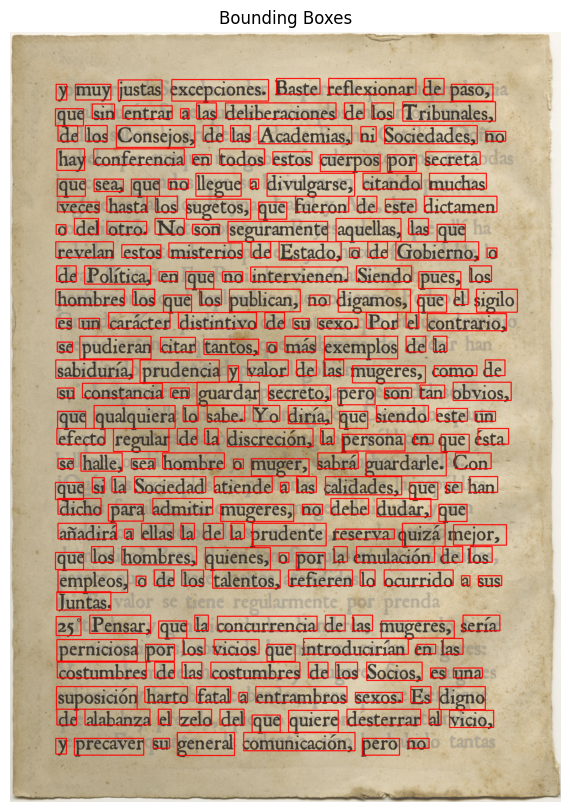

[INFO] Image shape: (2112, 1510, 3)
[INFO] Loaded 29 bounding boxes.


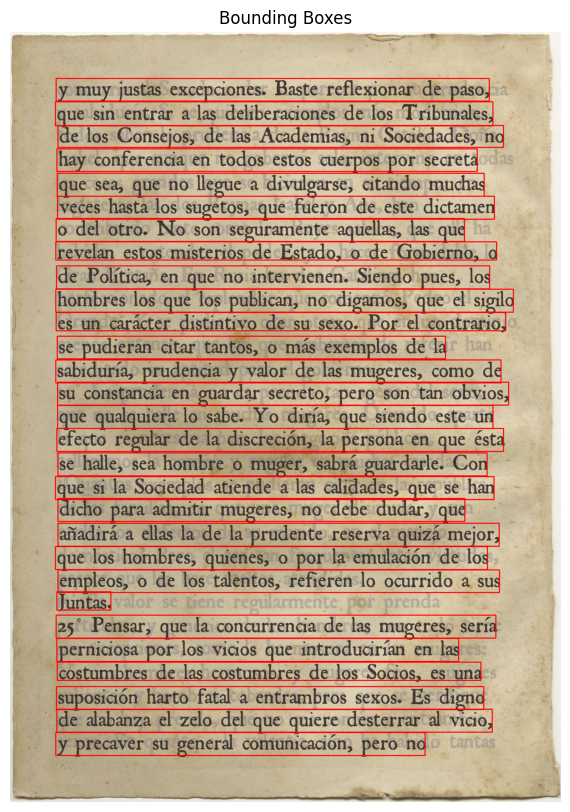

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_bounding_boxes(image_path, bbox_txt_path, box_color=(0, 0, 255), thickness=2):
    def imread_unicode(path):
        with open(path, "rb") as f:
            bytes_array = bytearray(f.read())
        np_array = np.asarray(bytes_array, dtype=np.uint8)
        img = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
        return img

    # Load image
    image = imread_unicode(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found or failed to load: {image_path}")
    
    print(f"[INFO] Image shape: {image.shape}")
    
    # Read bounding boxes
    with open(bbox_txt_path, 'r') as f:
        lines = f.readlines()

    print(f"[INFO] Loaded {len(lines)} bounding boxes.")
    
    for idx, line in enumerate(lines):
        line = line.strip()
        if not line:
            continue

        # Try splitting by comma
        parts = line.split(',')
        if len(parts) < 4:
            print(f"[WARNING] Skipping invalid line {idx}: '{line}'")
            continue

        try:
            x_min, y_min, x_max, y_max = [int(float(p.strip())) for p in parts[:4]]
        except ValueError as e:
            print(f"[ERROR] Line {idx} has invalid coordinates: {e}")
            continue


        # Draw bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), box_color, thickness)

    # Convert to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.figure(figsize=(12, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Bounding Boxes")
    plt.show()

page_number = "021"  # Example page number
image_path = rf"output/ALGO-OUTPUT/output_pages/Borbón_ROMAN_page_{page_number}.png"
bbox_path_line = rf"output/ALGO-OUTPUT/output_bboxes/Borbón_ROMAN_page_{page_number}_words.txt"
plot_bounding_boxes(image_path, bbox_path_line)

page_number = "021"  # Example page number
image_path = rf"output/ALGO-OUTPUT/output_pages/Borbón_ROMAN_page_{page_number}.png"
bbox_path_line = rf"output/ALGO-OUTPUT/output_bboxes/Borbón_ROMAN_page_{page_number}_lines.txt"
plot_bounding_boxes(image_path, bbox_path_line)
